In [1]:
cd ..

/Users/martin/Git/estates


In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
folder = 'data/silver'
files = os.listdir(folder)

In [4]:
dataframes = []
for file in files:
    csv = pd.read_csv(f'{folder}/{file}')
    dataframes.append(csv)

df = pd.concat(dataframes, axis=0, ignore_index=True)

In [5]:
columns = [
    # Target
    'Celková cena',

    # Features
    'Užitná plocha',
    'Podlaží',
    'estate_locality_district',
    'estate_disposition',
    'estate_category_main_cb',
    'Stavba',
    'Stav objektu',
    'Poznámka k ceně',
    'Energetická náročnost budovy',
    'Vlastnictví',
    'Tram',
    'Vybavení',
    'Výtah',
    'Divadlo',
    'Kino',
    'Obchod',
    'Cukrárna',
    'Veterinář',
    'Vlak',
    'Lékárna',
    'Bankomat',
    'Sportoviště',
    'Bus MHD',
    'Lékař',
    'Škola',
    'Školka',
    'Hospoda',
    'Pošta',
    'Restaurace',
    'Večerka',
    'Hřiště',
]

In [6]:
is_rental = df.loc[:, 'estate_rental_or_sell'] == 2
is_flat_or_house = df.loc[:, 'estate_category_main_cb'].isin([1, 2])
has_price = ~df.loc[:, 'Celková cena'].isna()
rentals = (
    df
    .loc[is_rental & is_flat_or_house & has_price, columns]
    .drop_duplicates()
)

In [7]:
rentals.head()

,Celková cena,Užitná plocha,Podlaží,estate_locality_district,estate_disposition,estate_category_main_cb,Stavba,Stav objektu,Poznámka k ceně,Energetická náročnost budovy,...,Sportoviště,Bus MHD,Lékař,Škola,Školka,Hospoda,Pošta,Restaurace,Večerka,Hřiště
1,11 200,30.0,3. podlaží,72,2,1,Cihlová,Velmi dobrý,"+ inkaso 1.500 Kč, 2 kauce a provize",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7 950,55.0,3. podlaží z celkem 5,65,5,1,Cihlová,Po rekonstrukci,"+ služby 2360, kauce 15900, + adm. poplatek 4000",Třída E - Nehospodárná,...,575.0,232.0,254.0,192.0,266.0,175.0,490.0,241.0,280.0,317.0
5,3 450,28.0,2. podlaží z celkem 3,62,3,1,Cihlová,Dobrý,"+ služby 1630, kauce 6900, + adm. poplatek 2000",Třída E - Nehospodárná,...,82.0,112.0,272.0,133.0,293.0,144.0,430.0,538.0,174.0,1246.0
6,6 000,56.0,4. podlaží z celkem 4,62,5,1,Cihlová,Dobrý,"+ služby 2830, kauce 12000, + adm. poplatek 3000",Třída E - Nehospodárná,...,464.0,294.0,193.0,640.0,114.0,199.0,426.0,231.0,292.0,284.0
8,90 000,350.0,NaN,57,37,2,Cihlová,Novostavba,+ poplatky cca 8.000 Kč,Třída G - Mimořádně nehospodárná č. 78/2013 Sb...,...,742.0,602.0,1111.0,1043.0,577.0,1427.0,1039.0,577.0,1039.0,1286.0


### celkova cena

In [150]:
rentals.loc[:, 'Celková cena'] = rentals.loc[:, 'Celková cena'].str.replace(r'\s', '').astype(int)

<ipython-input-150-be273b9fe8e5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rentals.loc[:, 'Celková cena'] = rentals.loc[:, 'Celková cena'].str.replace(r'\s', '').astype(int)


In [151]:
x = rentals.loc[:, 'Celková cena']

/Users/martin/opt/miniconda3/envs/estates/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Celková cena', ylabel='Density'>

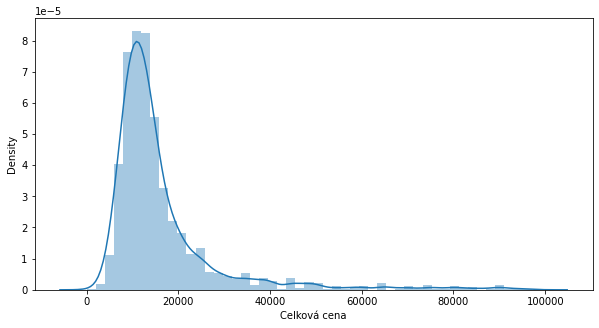

In [152]:
plt.figure(figsize=(10,5))
sns.distplot(x[x < 100000])

### Užitná plocha

In [153]:
x = rentals.loc[:, 'Užitná plocha']

In [154]:
x.describe()

count    12844.000000
mean        67.837356
std        153.786774
min          1.000000
25%         40.000000
50%         54.000000
75%         75.000000
max      15746.000000
Name: Užitná plocha, dtype: float64

In [155]:
x.isna().sum()

1

/Users/martin/opt/miniconda3/envs/estates/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Užitná plocha', ylabel='Density'>

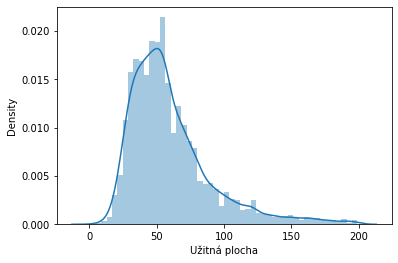

In [156]:
sns.distplot(x[x < 200])

### estate_locality_district

In [138]:
rentals.drop_duplicates().shape

(16722, 32)

In [160]:
rentals.loc[:, 'estate_locality_district'].value_counts().head(20)

5005    1223
72      1167
5004    1090
5003     872
5002     866
5001     859
5010     839
5006     683
5009     555
5008     486
65       403
12       400
5007     320
42       270
62       200
1        135
57       131
28       110
32        98
61        89
Name: estate_locality_district, dtype: int64

In [168]:
locality_district_mapping = {
    1: "ceske budejovice",
    12: "plzen-mesto",
    28: "hradec kralove",
    32: "pardubice",
    42: "olomouc",
    5001: "praha 1",
    5002: "praha 2",
    5003: "praha 3",
    5004: "praha 4",
    5005: "praha 5",
    5006: "praha 6",
    5007: "praha 7",
    5008: "praha 8",
    5009: "praha 9",
    5010: "praha 10",
    62: "karvina",
    65: "ostrava-mesto",
    72: "brno-mesto"
}

In [170]:
rentals.loc[:, 'estate_locality_district'].map(locality_district_mapping).fillna('ostatni')

1           brno-mesto
4        ostrava-mesto
5              karvina
6              karvina
8              ostatni
             ...      
73357          ostatni
73420    ostrava-mesto
73439          olomouc
73450          ostatni
73454          ostatni
Name: estate_locality_district, Length: 12845, dtype: object

####     'estate_disposition',

In [171]:
rentals.loc[:, 'estate_disposition'].value_counts()

4     3435
2     2531
5     1879
6     1366
3     1216
7     1100
8      380
37     285
9      280
47      86
10      71
39      67
11      61
12      33
16      32
33      17
43       4
35       2
Name: estate_disposition, dtype: int64

In [172]:
disposition_mapping = {
    2: "1+kk",
    3: "1+1",
    4: "2+kk",
    5: "2+1",
    6: "3+kk",
    7: "3+1",
    8: "4+kk",
    9: "4+1",
    10: "5+kk",
    11: "5+1",
    12: "6 a vice",
    16: "atypicky",
    37: "rodinny",
    39: "vila",
    43: "chalupa",
    33: "chata",
}

In [174]:
rentals.loc[:, 'estate_disposition'].map(disposition_mapping).fillna('ostatni').value_counts()

2+kk        3435
1+kk        2531
2+1         1879
3+kk        1366
1+1         1216
3+1         1100
4+kk         380
rodinny      285
4+1          280
ostatni       88
5+kk          71
vila          67
5+1           61
6 a vice      33
atypicky      32
chata         17
chalupa        4
Name: estate_disposition, dtype: int64

#### estate_category_main_cb

In [175]:
rentals.estate_category_main_cb.value_counts()

1    12470
2      375
Name: estate_category_main_cb, dtype: int64

In [176]:
category_mapping = {
    1: 'flat',
    2: 'house'
}

In [177]:
rentals.estate_category_main_cb.map(category_mapping)

1         flat
4         flat
5         flat
6         flat
8        house
         ...  
73357     flat
73420     flat
73439     flat
73450     flat
73454     flat
Name: estate_category_main_cb, Length: 12845, dtype: object

In [179]:
rentals.Stavba.value_counts()

Cihlová      9391
Panelová     2089
Smíšená      1003
Skeletová     299
Dřevěná        26
Kamenná        23
Montovaná      14
Name: Stavba, dtype: int64

In [59]:
rentals.loc[:, 'Energetická náročnost budovy'].value_counts()

Třída G - Mimořádně nehospodárná                                   10721
Třída G - Mimořádně nehospodárná č. 78/2013 Sb. podle vyhlášky      6728
Třída C - Úsporná                                                   1600
Třída C - Úsporná č. 78/2013 Sb. podle vyhlášky                     1572
Třída G - Mimořádně nehospodárná č. 264/2020 Sb. podle vyhlášky     1460
Třída B - Velmi úsporná č. 78/2013 Sb. podle vyhlášky               1158
Třída G - Mimořádně nehospodárná č. 148/2007 Sb. podle vyhlášky     1016
Třída B - Velmi úsporná                                             1014
Třída D - Méně úsporná                                               756
Třída D - Méně úsporná č. 78/2013 Sb. podle vyhlášky                 547
Třída C - Úsporná č. 148/2007 Sb. podle vyhlášky                     340
Třída E - Nehospodárná č. 78/2013 Sb. podle vyhlášky                 255
Třída E - Nehospodárná                                               224
Třída C - Úsporná č. 264/2020 Sb. podle vyhlášky   

In [202]:
efficiency_mapping = {
    'Třída A': 1,
    'Třída B': 2,
    'Třída C': 3,
    'Třída D': 4,
    'Třída E': 5,
    'Třída F': 6,
    'Třída G': 7
}

In [219]:
(
    rentals
    .loc[:, 'Energetická náročnost budovy']
    .apply(lambda x: re.match(r'Třída \w', x)[0] if isinstance(x, str) else x)
    .map(efficiency_mapping)
)

1        NaN
4        5.0
5        5.0
6        5.0
8        7.0
        ... 
73357    NaN
73420    3.0
73439    7.0
73450    7.0
73454    7.0
Name: Energetická náročnost budovy, Length: 12845, dtype: float64

In [60]:
rentals.loc[:, 'Poznámka k ceně'].value_counts()

+ poplatky                                                                                      137
bez poplatků, + provize RK                                                                       86
+ provize RK                                                                                     63
poplatky: viz text                                                                               49
+ energie                                                                                        37
                                                                                               ... 
+ zálohy na vodu/teplo/služby 3000 (vyučtování podle spotřeby) + elektřina a plyn na nájemce      1
+popl. 1800, +elektřina                                                                           1
+ služby 500,- Kč a energie zvlášť, kauce 8500, provize rk 8000+DPH                               1
+ služby + vratná kauce 20 000 Kč, poplatek RK  3 000 Kč                                          1


In [41]:
def parse_floor(x):
    if not x:
        return None
    elif isinstance(x, float) or isinstance(x, int):
        return x
    elif 'přízemí' in x:
        return 0

    parsed_x = str(x).split('.')[0]
    if 'včetně' in parsed_x:
        return int(parsed_x[0])

    try:
        x = int(parsed_x)
        x = max(x, -1)
        x = min(x, 20)
        return x
    except ValueError:
        return None


In [42]:
rentals.loc[:,'Podlaží'].apply(lambda x: parse_floor(x)).value_counts()

 2.0     3067
 3.0     2665
 1.0     2138
 4.0     1890
 5.0     1338
 6.0      730
 7.0      308
 8.0      178
 0.0       88
 9.0       79
 10.0      52
 11.0      42
-1.0       39
 12.0      39
 13.0      34
 14.0      11
 15.0       8
 17.0       6
 20.0       6
 18.0       2
 16.0       2
Name: Podlaží, dtype: int64

In [74]:
df.loc[:,'Stavba',].value_counts()

Cihlová      46143
Smíšená       8621
Panelová      7587
Skeletová     4045
Dřevěná        898
Montovaná      713
Kamenná        309
Name: Stavba, dtype: int64

In [75]:
df.loc[:,'Stav objektu'].value_counts()

Velmi dobrý          29994
Po rekonstrukci      12455
Novostavba           10597
Dobrý                10105
Ve výstavbě           2267
Před rekonstrukcí     1976
Projekt                703
Špatný                 161
K demolici              58
Name: Stav objektu, dtype: int64

In [43]:
furnishing_mapping = {
    'True': 1,
    'Částečně': 0.5,
    'False': 0,
}

In [45]:
rentals.loc[:, 'Vybavení'].map(furnishing_mapping).value_counts()

1.0    3722
0.0    2887
0.5    2721
Name: Vybavení, dtype: int64

## round 2

In [49]:
cd src/data/gold

/Users/martin/Git/estates/src/data/gold


In [54]:
from preprocessing import *
from mappings import *

In [52]:
r = load_rentals(df)

In [58]:
b = pd.DataFrame()
b = b.assign(
    price = preprocess_price(r),
    area_m2 = r.loc[:, 'Užitná plocha'],
    district = apply_column_mapping(r, 'estate_locality_district', locality_district_mapping),
    disposition = apply_column_mapping(r, 'estate_disposition', disposition_mapping),
    category = apply_column_mapping(r, 'estate_category_main_cb', category_mapping),
    furnishing = apply_column_mapping(r, 'Vybavení', furnishing_mapping),
    efficiency = preprocess_efficiency(r),
    floor = preprocess_floor(r),
    building_type = r.loc[:, 'Stavba'],
    building_state = r.loc[:, 'Stav objektu'],
    ownership = r.loc[:, 'Vlastnictví'],
    tram = r.loc[:, 'Tram'],
    elevator = r.loc[:, 'Výtah'],
    theatre = r.loc[:, 'Divadlo'],
    cinema = r.loc[:, 'Kino'],
    groceries = r.loc[:, 'Obchod'],
    candy_shop = r.loc[:, 'Cukrárna'],
    veterinary = r.loc[:, 'Veterinář'],
    train = r.loc[:, 'Vlak'],
    pharmacist = r.loc[:, 'Lékárna'],
    atm = r.loc[:, 'Bankomat'],
    sports = r.loc[:, 'Sportoviště'],
    bus = r.loc[:, 'Bus MHD'],
    doctors = r.loc[:, 'Lékař'],
    school = r.loc[:, 'Škola'],
    kindergarten = r.loc[:, 'Školka'],
    pub = r.loc[:, 'Hospoda'],
    post_office = r.loc[:, 'Pošta'],
    restaurant = r.loc[:, 'Restaurace'],
    seven_eleven = r.loc[:, 'Večerka'],
    playground = r.loc[:, 'Hřiště'],
)

In [59]:
b.head()

,price,area_m2,district,disposition,category,furnishing,efficiency,floor,building_type,building_state,...,sports,bus,doctors,school,kindergarten,pub,post_office,restaurant,seven_eleven,playground
1,11200,30.0,brno-mesto,1+kk,flat,NaN,NaN,3.0,Cihlová,Velmi dobrý,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7950,55.0,ostrava-mesto,2+1,flat,NaN,5.0,3.0,Cihlová,Po rekonstrukci,...,575.0,232.0,254.0,192.0,266.0,175.0,490.0,241.0,280.0,317.0
5,3450,28.0,karvina,1+1,flat,NaN,5.0,2.0,Cihlová,Dobrý,...,82.0,112.0,272.0,133.0,293.0,144.0,430.0,538.0,174.0,1246.0
6,6000,56.0,karvina,2+1,flat,NaN,5.0,4.0,Cihlová,Dobrý,...,464.0,294.0,193.0,640.0,114.0,199.0,426.0,231.0,292.0,284.0
8,90000,350.0,NaN,rodinny,house,0.0,7.0,NaN,Cihlová,Novostavba,...,742.0,602.0,1111.0,1043.0,577.0,1427.0,1039.0,577.0,1039.0,1286.0
